In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random

C:\Users\shank\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def data_visualize(images, labels, n_rows=3, n_cols=3):
    f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(9,9))
    for axe in axes:
        for axe_plot in axe:
            i = random.randint(0, len(images))
            axe_plot.imshow(images[i], cmap='gray')
            axe_plot.set_title(labels[i])

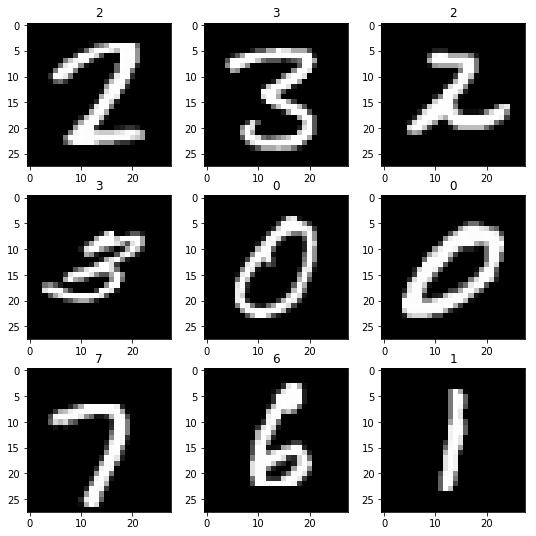

In [6]:
data_visualize(x_train, y_train)

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)

In [12]:
y_train.shape

(60000, 10)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                test_size=0.2, shuffle=True)

In [14]:
x_train.shape

(48000, 28, 28, 1)

In [19]:
y_train.shape

(48000, 10)

In [16]:
x_val.shape

(12000, 28, 28, 1)

In [18]:
y_val.shape

(12000, 10)

In [20]:
from keras.models import Model, load_model
from keras.layers import Dense, Dropout, Flatten, Reshape, Input, BatchNormalization, Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import ModelCheckpoint

In [27]:
def get_model(input_shape):
    
    X_input = Input(input_shape)
    
    X = BatchNormalization()(X_input)
    
    X = Conv2D(8, (3,3), strides=(1,1), activation='relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Conv2D(16, (3,3), strides=(1,1), activation='relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Conv2D(32, (3,3), strides=(1,1), activation='relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Flatten()(X)
    
    X = BatchNormalization()(X)
    
    X = Dense(128, activation='relu')(X)
    
    X = Dense(10, activation='softmax')(X)
    
    model = Model(inputs=[X_input], outputs=[X])
    
    return model
    

In [28]:
model = get_model((28, 28, 1))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)          4640      
__________

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
f_path = 'mode.h5'
msave = ModelCheckpoint(f_path, save_best_only=True)

In [32]:
epochs = 5
batch_size = 16
training = model.fit(x=x_train, y=y_train, 
                     validation_data=[x_val, y_val],
                     epochs=epochs,
                     batch_size=batch_size,
                     verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 63s 1ms/step - loss: 0.2749 - acc: 0.9167 - val_loss: 0.1230 - val_acc: 0.9603
Epoch 2/5
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1246 - acc: 0.9620 - val_loss: 0.0878 - val_acc: 0.9725
Epoch 3/5
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0989 - acc: 0.9679 - val_loss: 0.0722 - val_acc: 0.9769
Epoch 4/5
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0843 - acc: 0.9729 - val_loss: 0.0576 - val_acc: 0.9815
Epoch 5/5
48000/48000 [==============================] - 57s 1ms/step - loss: 0.0732 - acc: 0.9768 - val_loss: 0.0587 - val_acc: 0.9811


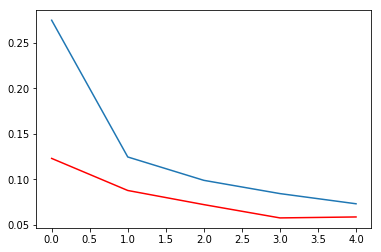

In [33]:
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']


tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')



In [39]:
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)

pred_digits = np.argmax(pred, axis=1)


accuracy_score(y_test, pred_digits)

0.9789

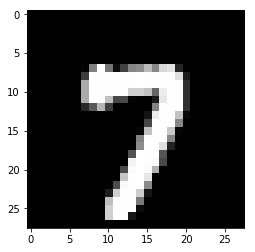

In [51]:
i = np.random.randint(0, len(x_test))

test_img = x_test[i]

plt.imshow(test_img, cmap='gray')

In [47]:
def predict(img, model):
    img = img.reshape((1, 28, 28, 1))
    pred = model.predict(img)
    
    return np.argmax(pred, axis=1)[0]

In [52]:
predict(test_img, model)

7